In [86]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
import json

In [ ]:
# iterate through each 
def get_word(spalte):
    spalte.dropna(inplace = True)
    r = spalte.apply(lambda x: get_w(x))
    return r

# return first element of tuple, in our case the word of the word-similarity pair
def get_w(liste):
    # if elems of liste are tuples, return first object of tuple
    if isinstance(liste[0], tuple):
        return [i[0] for i in liste]
    # if liste is list of list of tuple, then return first elem of tuple in list of list
    else:
        return [i[0] for y in liste for i in y]
    
def convert_time(x):
    return x/60

In [ ]:
# read in csv
results = pd.read_csv("C:/Users/Anna/Documents/Bachelorarbeit/results.csv", sep = ";")
results.head()
# top_5 was a string, is now converted to the dictionary it actually is
results["top_5"] = results['top_5'].map(eval)
# each topic dict in the top_5 dict gets added to its own column
results = pd.concat([results, results['top_5'].apply(pd.Series)], axis=1)
# convert runtime from seconds to minutes
results["runtime"] = results["runtime"].apply(convert_time)
# extract for each list of top_5 for each topic the words from the tuples of words and similarity scores
results = results.apply(lambda x: get_word(x) if x.name in ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11'] else x)

In [3]:
def nr_of_diff_words(in_series):
    words_suggested = set()
    #print(in_series)
    for index, value in in_series.items():
        if index in ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11']:
            if isinstance(value, list):
                for word in value:
                    words_suggested.add(word)
            #print("index ",index)
            #print("value ", value)
    #print(words_suggested)
    #print("neu")
    return len(words_suggested)
    #in_series.apply(lambda x: get_word(x) if x.name in 
     #               ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11'] else x)
    

In [4]:
results_2 = results.copy()
results_2["different titles given"] = results_2.apply(nr_of_diff_words, axis = 1)
results_2.drop(['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11'], axis = 1, inplace = True)
results_2.head(150)

,Unnamed: 0,data,model,cleaning,layers,runtime,top_5,different titles given
0,0,keywords,BERT,basic,1,1.567224,"{'t1': [['independent', 0.8901031906], ['membe...",18
1,1,keywords,BERT,basic,2,1.390632,"{'t1': [['com', 0.8344645895], ['##mun', 0.829...",20
2,2,keywords,BERT,basic,3,1.397561,"{'t1': [['com', 0.866940365], ['##mun', 0.8149...",17
3,3,keywords,BERT,basic,4,1.392061,"{'t1': [['##mun', 0.8084791829], ['term', 0.76...",14
4,4,keywords,BERT,basic,5,1.389613,"{'t1': [['##mun', 0.7659616718000001], ['pensi...",10
5,5,keywords,BERT,basic,6,1.390399,"{'t1': [['##mun', 0.761328596], ['pension', 0....",12
6,6,keywords,BERT,basic,7,1.390384,"{'t1': [['##mun', 0.764869161], ['pension', 0....",12
7,7,keywords,BERT,basic,8,1.390318,"{'t1': [['##mun', 0.7408599861], ['pension', 0...",13
8,8,keywords,BERT,basic,9,1.389615,"{'t1': [['##mun', 0.7620797036], ['pension', 0...",11
9,9,keywords,BERT,basic,10,1.388898,"{'t1': [['##mun', 0.7220959861], ['job', 0.636...",10


In [22]:
results = pd.concat([results, results_2["different titles given"]], axis = 1)
results.head(152)

,Unnamed: 0,data,model,cleaning,layers,runtime,top_5,t1,t10,t11,t2,t3,t4,t5,t6,t7,t8,t9,different titles given
0,0,keywords,BERT,basic,1,1.567224,"{'t1': [['independent', 0.8901031906], ['membe...","[independent, members, internal, bonus, spirit]","[approach, importance, transparency, improveme...","[members, ##mun, com, times, independent]","[##mun, compensation, com, independent, bonus]","[internal, pension, ##mun, independent, compen...","[independent, times, spirit, ##mun, bonus]","[com, ##mun, term, independent, internal]","[com, ##mun, independent, bonus, internal]","[times, members, internal, com, independent]","[com, times, ##mun, term, internal]","[##mun, spirit, approach, team, dedicated]",18
1,1,keywords,BERT,basic,2,1.390632,"{'t1': [['com', 0.8344645895], ['##mun', 0.829...","[com, ##mun, internal, independent, bonus]","[job, growth, value, approach, transparency]","[##mun, com, internal, independent, members]","[##mun, com, compensation, bonus, independent]","[##mun, internal, com, pension, stable]","[##mun, com, independent, times, internal]","[##mun, com, term, independent, internal]","[com, ##mun, internal, independent, ##cation]","[##mun, com, internal, times, members]","[##mun, com, term, internal, times]","[##mun, spirit, dedicated, years, ##cation]",20
2,2,keywords,BERT,basic,3,1.397561,"{'t1': [['com', 0.866940365], ['##mun', 0.8149...","[com, ##mun, term, members, internal]","[term, long, priority, value, growth]","[##mun, com, members, internal, times]","[com, ##mun, term, independent, compensation]","[##mun, com, pension, internal, stable]","[com, ##mun, times, term, independent]","[com, ##mun, term, social, pension]","[com, ##mun, internal, term, social]","[com, ##mun, term, long, internal]","[com, ##mun, term, internal, long]","[##mun, com, dedicated, spirit, internal]",17
3,3,keywords,BERT,basic,4,1.392061,"{'t1': [['##mun', 0.8084791829], ['term', 0.76...","[##mun, term, com, pension, social]","[term, long, pension, ##mun, work]","[##mun, com, members, internal, pay]","[##mun, term, com, benefits, pension]","[##mun, pension, term, com, social]","[##mun, term, com, long, team]","[##mun, term, com, pension, social]","[##mun, term, com, internal, social]","[##mun, term, com, long, team]","[##mun, term, com, long, pension]","[##mun, term, com, dedicated, spirit]",14
4,4,keywords,BERT,basic,5,1.389613,"{'t1': [['##mun', 0.7659616718000001], ['pensi...","[##mun, pension, com, spirit, social]","[pension, term, ##mun, work, transparency]","[##mun, pension, benefits, social, com]","[##mun, pension, benefits, com, term]","[##mun, pension, social, term, work]","[##mun, com, term, pension, spirit]","[##mun, pension, term, com, benefits]","[##mun, pension, com, term, social]","[##mun, term, com, pension, benefits]","[##mun, term, pension, com, social]","[##mun, spirit, term, com, internal]",10
5,5,keywords,BERT,basic,6,1.390399,"{'t1': [['##mun', 0.761328596], ['pension', 0....","[##mun, pension, term, social, com]","[pension, term, ##mun, work, social]","[##mun, social, pension, benefits, pay]","[##mun, pension, benefits, term, social]","[##mun, pension, social, term, work]","[##mun, term, social, spirit, com]","[##mun, pension, term, benefits, social]","[##mun, pension, social, term, com]","[##mun, term, social, long, benefits]","[##mun, term, pension, benefits, social]","[##mun, spirit, term, internal, planning]",12
6,6,keywords,BERT,basic,7,1.390384,"{'t1': [['##mun', 0.764869161], ['pension', 0....","[##mun, pension, term, social, package]","[pension, term, ##mun, pay, job]","[##mun, pension, pay, social, benefits]","[##mun, pension, benefits, pay, social]","[##mun, pension, social, term, pay]","[##mun, pension, spirit, term, social]","[##mun, pension, term, pay, social]","[##mun, pension, social, term, spirit]","[##mun, term, pension, social, long]","[##mun, pension, term, social, benefits]","[##mun, spirit, years, term, times]",12
7,7,keywords,BERT,basic,8,1.390318,"{'t1': [['##mun', 0.7408599861], ['pen

In [176]:
def subtract_55(x):
    return 55-x

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

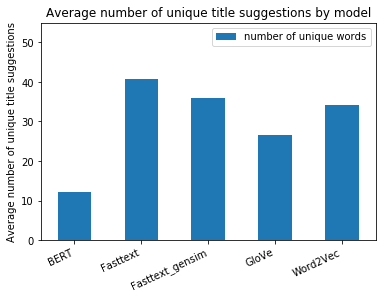

In [242]:
title_numbers = pd.DataFrame()
title_numbers["number of unique words"] = results.groupby(["model"])["different titles given"].mean()#.apply(subtract_55).divide(55)
#rtgraph = rtgraph.groupby(["runtime"])
#rtgraph["average runtime"] = rtgraph.apply(pd.mean()).reset_index()
#title_numbers.sort_values(by=['percentag'])
title_numbers.plot.bar()
#plt.grid()
plt.title('Average number of unique title suggestions by model')
plt.ylabel('Average number of unique title suggestions')
plt.xlabel("")
plt.ylim((0,55))
plt.xticks(rotation=25, ha=ha[0])

In [289]:
title_numbers = pd.DataFrame()
title_numbers["number of unique words"] = results.groupby(["model"])["different titles given"].mean()#.apply(subtract_55).divide(55)
title_numbers.head()

,number of unique words
model,
BERT,12.191667
Fasttext,40.750000
Fasttext_gensim,35.875000
GloVe,26.500000
Word2Vec,34.250000


Text(0.5,0,'BERT embeddings used (layer/mode)')

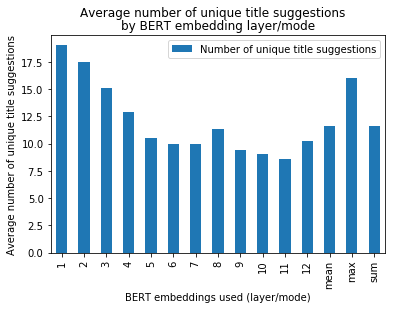

In [235]:
bertgraph = pd.DataFrame()
bertgraph["Number of unique title suggestions"] = results.loc[
    results['model'] == "BERT"].groupby(["layers"], sort=False)["different titles given"].mean()#.divide(0.55)
#rtgraph = rtgraph.groupby(["runtime"])
#rtgraph["average runtime"] = rtgraph.apply(pd.mean()).reset_index()
#bertgraph.sort_values(by=['average number of different titles'])
#bertgraph = bertgraph.divide(55)
#bertgraph["percentage of repeated titles"] = bertgraph["percentage of repeated titles"].apply(subtract_55).divide(55).multiply(100)
bertgraph.plot.bar()
#plt.ylim((0,55))
#plt.grid()
#plt.xticks(rotation=90, ha=ha[0])
plt.suptitle('Average number of unique title suggestions')
plt.title('by BERT embedding layer/mode')
plt.ylabel('Average number of unique title suggestions')
plt.xlabel("BERT embeddings used (layer/mode)")

In [291]:
bertgraph.head(16)

,Number of unique title suggestions
layers,
1,19.000
2,17.500
3,15.125
4,12.875
5,10.500
6,10.000
7,10.000
8,11.375
9,9.375


In [5]:
Bert_analysis = results_2.loc[results_2['model'] == "BERT"]
Bert_analysis["average number of different words"] = Bert_analysis.groupby(["layers"])["different titles given"].mean()
Bert_analysis.head(150)
#Bert_analysis.sort_values(by=['different titles given']).head(150)

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,data,model,cleaning,layers,runtime,top_5,different titles given,average number of different words
0,0,keywords,BERT,basic,1,1.567224,"{'t1': [['independent', 0.8901031906], ['membe...",18,NaN
1,1,keywords,BERT,basic,2,1.390632,"{'t1': [['com', 0.8344645895], ['##mun', 0.829...",20,NaN
2,2,keywords,BERT,basic,3,1.397561,"{'t1': [['com', 0.866940365], ['##mun', 0.8149...",17,NaN
3,3,keywords,BERT,basic,4,1.392061,"{'t1': [['##mun', 0.8084791829], ['term', 0.76...",14,NaN
4,4,keywords,BERT,basic,5,1.389613,"{'t1': [['##mun', 0.7659616718000001], ['pensi...",10,NaN
5,5,keywords,BERT,basic,6,1.390399,"{'t1': [['##mun', 0.761328596], ['pension', 0....",12,NaN
6,6,keywords,BERT,basic,7,1.390384,"{'t1': [['##mun', 0.764869161], ['pension', 0....",12,NaN
7,7,keywords,BERT,basic,8,1.390318,"{'t1': [['##mun', 0.7408599861], ['pension', 0...",13,NaN
8,8,keywords,BERT,basic,9,1.389615,"{'t1': [['##mun', 0.7620797036], ['pension', 0...",11,NaN
9,9,keywords,BERT,basic,10,1.388898,"{'t1': [['##mun', 0.7220959861], ['job', 0.636...",10,NaN


In [ ]:
GloVe_analysis = results_2.loc[results_2['model'] == "GloVe"]
GloVe_analysis.sort_values(by=['different titles given']).head(150)

In [ ]:
Word2Vec_analysis = results_2.loc[results_2['model'] == "Word2Vec"]
Word2Vec_analysis.sort_values(by=['different titles given']).head(150)

In [ ]:
Fasttext_analysis = results_2.loc[results_2['model'] == "Fasttext"]
Fasttext_analysis.sort_values(by=['different titles given']).head(150)

In [ ]:
Fasttext_gensim_analysis = results_2.loc[results_2['model'] == "Fasttext_gensim"]
Fasttext_gensim_analysis.sort_values(by=['different titles given']).head(150)

In [6]:
# read in csv
#comments = pd.read_excel("C:/Users/Anna/Documents/Bachelorarbeit/Daten_mit_Titeln/BA_Anna_ResultingComments.xlsx", sheet_name = "Representative Comments")
comments = pd.read_csv("C:/Users/Anna/Documents/Bachelorarbeit/Daten_mit_Titeln/BA_Anna_ResultingComments_csv.csv", sep = ";", header = 1)
comments.head(55)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
0,- A learning and developing platform that attr...,A variety of challenges offers an attractive w...,#NAME?,- A socially easygoing and dynamic work enviro...,[anonymized] employee support.,"I value the challenging work, and the opportun...",- Strong focus on innovation and the customer ...,#NAME?,"A relatively secure work place, good remunerat...","- Diverse working areas, opportunities to chan...",- high level of long-term strategic knowledge ...
1,- Safety is first priority - International co...,Ability to reconcile family and career; innova...,- good long-term planning of capacities and sc...,- Diverse development opportunities - Generall...,[anonymized] has shown a high degree of respon...,- If the research and development is more flex...,+ excellent leadership; + [anonymized] stands ...,- Staff training; - The climate of the working...,"a secure job, good company pension (at least t...",A trustworthy employer with strong innovative ...,1) A strong commitment to the growth and devel...
2,"1. Safety is the priority, and any lack of com...",At least in immediate environment and the curr...,[anonymized] has been around > 150 years and I...,"- Mutual, constructive collaboration between e...",[anonymized] is strongly anchored in the regio...,1. Culture to express your ideas/views. Openn...,A company that demonstrates in its actions tha...,At [anonymized] we create chemistry. We are a ...,"Appraisal for employees and customers, flexibi...",company stability. open communication. team sp...,1. Sustainable mid/long term growth instead of...
3,An employer that does everything to keep peopl...,[anonymized] is a great company to work with. ...,[anonymized] is a solid employer who motivates...,- Relatively well ensured work place - Compati...,[anonymized]'s commitment to employees,1. Bring new ideas and solutions to industries...,"A strong focus on CPD for employees, job secur...","At [anonymized], I value the culture of collab...",As a good and serious employer.,"Employee commitment, team spirit",A compelling vision for the company that I can...
4,Attach importance to R&D; Job Rotation; Safety...,[anonymized] is a long established Company wit...,[anonymized] is like one big Family understand...,"A variety of duties, with my role spanning int...",[anonymized]'s commitment to its employees,1. The leadership view is most valued for me f...,[anonymized] attaches great importance to sust...,"Availability, correctness in the work environm...",As an employer: good benefits. As a company: e...,Flexible work and vacation time. Free provisio...,[anonymized] always try to innovate and invest...
5,Attention to safety,[anonymized] is a very social company which pr...,[anonymized] is right to be proud of a good 15...,"Additional benefits, freedom of working, mobil...",Breathing space; high quality employees; relia...,"As a young researcher, I am taken seriously an...",[anonymized] has proven success through innova...,[anonymized] is a sustainable company. Therefo...,[anonymized] is a very good employer with very...,Good team support,[anonymized] has developed into a brand; adher...
6,[anonymized] is very family-friendly; safety i...,[anonymized] is my family,[anonymized] is still rock solid in the [ano...,"Appreciate employees, group structures, safety...","Commitment to employees, working environment a...",[anonymized] is a great company to work with. ...,"Belief in environmental sustainability, safety...",[anonymized]'s emphasis on safety is what I va...,"Broad positioning, international and job security","Great team work, have a team that is willing t...",[anonymized] is an organization that stands fo...
7,Best possible portfolio amongst peers and comp...,[anonymized]'s unique culture of trust and ope...,Clear planning and portfolio management. Board...,[anonymized] has a wide range of information e...,Company values. The global [anonymized] family...,[anonymized] is an open and accepting environm...,"Career 

In [ ]:
print(comments["t6"][23].split(" "))

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

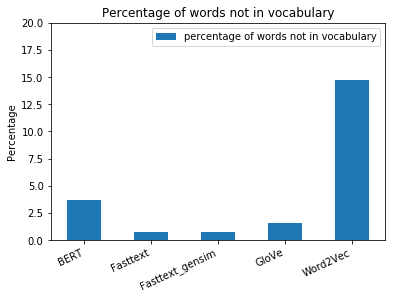

In [210]:
ha = ['right', 'center', 'left']
words_not_in_vocab = {"BERT": 345/92.71, "Fasttext": 69/92.71, "Fasttext_gensim": 72/92.71, "GloVe": 143/92.71, 
                      "Word2Vec": 1367/92.71}
wbiv = pd.DataFrame.from_dict(words_not_in_vocab, orient='index')
wbiv["percentage of words not in vocabulary"] = pd.DataFrame.from_dict(words_not_in_vocab, orient='index')
wbiv.plot.bar(y = "percentage of words not in vocabulary" )
plt.title("Percentage of words not in vocabulary")
plt.ylabel("Percentage")
#plt.xlabel("model")
plt.ylim((0,20))
#plt.grid()
plt.xticks(rotation=25, ha=ha[0])

In [ ]:
mini = []
maxi = []
for i in comments.columns:
    mini.append(comments[i].map(lambda x: len(x)).min())
    maxi.append(comments[i].map(lambda x: len(x)).max())

print(mini, maxi)
print("minimal lenght: ", min(mini))
print("maximal length: ", max(maxi))

In [ ]:
all_comments = []
for topic in comments.columns:
    comments[topic].dropna(inplace = True)
    print(comments[topic])
    all_comments.append(comments[topic].tolist())

In [ ]:
corpus = []
for i in all_comments:
    corpus.append(' '.join(i))

In [ ]:
print(corpus)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idf without stopword removal
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.shape)
df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
# Get a series containing maximum value of each row
maxValues = df.idxmax(axis=1)
print('Maximum value in each row : ')
print(maxValues)

In [ ]:
# tf-idf with stopword removal
vectorizer2 = TfidfVectorizer(stop_words = 'english')
X2 = vectorizer2.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.shape)
df2 = pd.DataFrame(X2.toarray(), columns = vectorizer2.get_feature_names())
# Get a series containing maximum value of each row
maxValues2 = df2.idxmax(axis=1)
print('Maximum value in each row : ')
print(maxValues2)

In [ ]:
in_put = pd.read_excel("C:/Users/Anna/Documents/Bachelorarbeit/Daten_mit_Titeln/BA_Anna_ResultingComments.xlsx",
                   sheet_name = 0, index_col = 0, skiprows = 0).T
keywords = in_put.drop("Given titles")
true_lab = in_put.drop("Keywords")
true_lab.head()
true_lab.head(12)



In [ ]:
# 72-75 sind alle genau gleich und 137 und 139
line_72 = results.iloc[72]["t9"]
print(line_72)

In [7]:
order = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11']
def get_results(line_nr):
    a = {}
    for x in true_labels.keys():
        a[x] = []
        a[x].append(true_labels[x])
        #print(results.iloc[line_nr][x])
        for y in results.iloc[line_nr][x]:
            a[x].append(y)
    
    res = pd.DataFrame.from_dict(a)[order]
    res.rename(index={0:'Human generated title',1:'model title suggestion 1',2:'model title suggestion 2',
                      3:'model title suggestion 3',4:'model title suggestion 4',5:'model title suggestion 5'}, 
                       inplace=True)
    return res

In [12]:
maxValuesdf = pd.DataFrame(maxValues).T
maxValues2df = pd.DataFrame(maxValues2).T
print((keywords["t1"][0]).split(",")[0])
#maxValuesdf.head(12)

NameError: name 'maxValues' is not defined

In [8]:
order = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11']
def get_baselines():
    a = {}
    for x,y in zip(true_labels.keys(), maxValuesdf.columns):
        a[x] = []
        a[x].append(true_labels[x])
        a[x].append((keywords[x][0]).split(",")[0])
        #print(results.iloc[line_nr][x])
        a[x].append(maxValuesdf.iloc[0][y])
        a[x].append(maxValues2df.iloc[0][y])
        #a[x].append(keywords)
    
    res = pd.DataFrame.from_dict(a)[order]
    res.rename(index={0:'Human generated title',1:'baselie first keyword',2:'baseline tf-idf with stopwords',
                      3:'baseline tf-idf without stopwords'}, 
                       inplace=True)
    return res

In [ ]:
table = get_baselines()
table.head()

In [ ]:
order = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11']

In [ ]:
line_75 = get_results(75)
line_75 = line_75[reihenfolge]
line_75.rename(index={0:'Human generated title',1:'model title suggestion 1',2:'model title suggestion 2',
                      3:'model title suggestion 3',4:'model title suggestion 4',5:'model title suggestion 5'}, inplace=True)
line_75.head(10)

In [216]:
get_results(131).head(10)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
Human generated title,[safety],"[working, environment]",[stability],"[career, opportunities]","[commitment, to, employees]","[opportunity, to, work, on, new, ideas]","[sustainable, innovation]","[worker, orientation]","[job, security, total, offer]","[team, spirit]","[long, term, vision]"
model title suggestion 1,social,social,social,social,social,social,social,social,upper,social,social
model title suggestion 2,pension,pension,pension,upper,upper,pension,upper,pension,social,pension,pension
model title suggestion 3,upper,upper,job,pension,pension,job,one,upper,one,upper,job
model title suggestion 4,job,job,first,first,one,upper,pension,job,im,job,upper
model title suggestion 5,one,first,upper,im,im,first,im,first,first,first,one


In [282]:
line_131 = get_results(131)
line_131.to_latex(buf = "C:/Users/Anna/Documents/Bachelorarbeit/Ergebnis_Comments_BERT_basic_stopwords_vocab_131.tex", index = False, bold_rows= True)

In [ ]:
get_results(147).head(10)

In [ ]:
get_results(139).head(10)

In [110]:
true_labels = {"t1": ["safety"], "t2": ["working", "environment"], "t3": ["stability"], 
               "t4": ["career", "opportunities"], "t5": ["commitment", "to", "employees"], 
               "t6": ["opportunity", "to", "work", "on", "new", "ideas"], "t7": ["sustainable", "innovation"],
               "t8": ["worker", "orientation"], "t9": ["job", "security", "total", "offer"],
               "t10": ["team", "spirit"], "t11": ["long", "term", "vision"]}

In [10]:
import math
def get_indices(x: list, true_label:list):
    result = []
    #print(type(true_label))
    if isinstance(x, list):  
        for i in range(len(x)):
            #print(x[i])
            #print(true_label.str.split(" ").lower().tolist()[0])
            if x[i] in true_label:
                print("found one")
                result.append(i)
        return result
    else:
        print("fehler")
        return result

In [130]:
#import nltk
#from nltk.corpus import words
from spellchecker import SpellChecker
spell = SpellChecker()
#nltk.download('words')
#>>> "would" in words.words()
def get_words(x: list):
    #print(type(true_label))
    counter = 0
    if isinstance(x, list):  
        misspelled = spell.unknown(x)
        #print(misspelled)
        counter = len(misspelled)
        #for i in range(len(x)):
            #print(x[i])
            #print(true_label.str.split(" ").lower().tolist()[0])
            #if x[i] in words.words():
                #print("found one")
                #counter += 1
            #else:
               
            #print(x[i])
        #print(counter)    
        return 5-counter
    else:
        print("fehler")
        return counter

In [112]:
!pip install pyspellchecker

  Using cached https://files.pythonhosted.org/packages/04/d1/ec4e830e9f9c1fd788e1459dd09279fdf807bc7a475579fd7192450b879c/pyspellchecker-0.5.4-py2.py3-none-any.whl


You are using pip version 9.0.1, however version 20.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [131]:
df = pd.DataFrame()
for topic in true_labels.keys():
    #results[topic].fillna("", inplace = True)
    # count how many words are actually english words
    df[topic] = results[topic].apply(lambda x: get_words(x))

fehler
fehler
fehler
fehler


In [132]:
# sum up how many words are english words in row (trial)
df["sum"] = df.sum(axis=1)
# calculate percentage of non-words by dividing by 55, the total of words generated by each model
# and taking 1-percentage
df["percentage of non-words"] = df["sum"].divide(55).apply(subtract_one)
print(df[0:50])
print(df[50:100])
print(df[100:152])

    t1  t2  t3  t4  t5  t6  t7  t8  t9  t10  t11  sum  percentage of non-words
0    5   4   4   4   4   4   5   4   4    5    4   47                 0.145455
1    4   4   4   4   4   3   4   4   3    5    4   43                 0.218182
2    4   4   4   4   4   4   4   4   4    5    4   45                 0.181818
3    4   4   4   4   4   4   4   4   4    4    4   44                 0.200000
4    4   4   4   4   4   4   4   4   4    4    4   44                 0.200000
5    4   4   4   4   4   4   4   4   4    4    4   44                 0.200000
6    4   4   4   4   4   4   4   4   4    4    4   44                 0.200000
7    4   4   4   4   4   4   4   4   4    4    4   44                 0.200000
8    4   4   4   4   4   4   4   4   4    4    4   44                 0.200000
9    4   4   4   4   4   4   4   4   4    5    4   45                 0.181818
10   4   4   4   4   4   4   4   4   4    5    4   45                 0.181818
11   4   4   4   4   4   4   4   4   5    5    4   4

In [ ]:
print(df[0:50])
print(df[50:100])
print(df[100:152])

In [ ]:
indices_correct = pd.DataFrame()
for topic in true_labels.keys():
    #results[topic].fillna("", inplace = True)
    indices_correct[topic] = results[topic].apply(lambda x: get_indices(x, true_labels[topic]))
print(indices_correct[0:50])
print(indices_correct[50:100])
print(indices_correct[100:152])

In [ ]:
print(full_results["t5"].iloc[72])

In [63]:
def subtract_one(x):
    return (1-x)

In [333]:
full_results = pd.DataFrame()
full_results = pd.concat([results, df['percentage of non-words']], axis=1)
#full_results = pd.concat([full_results, results_2["different titles given"]], axis = 1)
full_results.head(152)

,Unnamed: 0,data,model,cleaning,layers,runtime,top_5,t1,t10,t11,t2,t3,t4,t5,t6,t7,t8,t9,different titles given,percentage of non-words
0,0,keywords,BERT,basic,1,1.567224,"{'t1': [['independent', 0.8901031906], ['membe...","[independent, members, internal, bonus, spirit]","[approach, importance, transparency, improveme...","[members, ##mun, com, times, independent]","[##mun, compensation, com, independent, bonus]","[internal, pension, ##mun, independent, compen...","[independent, times, spirit, ##mun, bonus]","[com, ##mun, term, independent, internal]","[com, ##mun, independent, bonus, internal]","[times, members, internal, com, independent]","[com, times, ##mun, term, internal]","[##mun, spirit, approach, team, dedicated]",18,0.145455
1,1,keywords,BERT,basic,2,1.390632,"{'t1': [['com', 0.8344645895], ['##mun', 0.829...","[com, ##mun, internal, independent, bonus]","[job, growth, value, approach, transparency]","[##mun, com, internal, independent, members]","[##mun, com, compensation, bonus, independent]","[##mun, internal, com, pension, stable]","[##mun, com, independent, times, internal]","[##mun, com, term, independent, internal]","[com, ##mun, internal, independent, ##cation]","[##mun, com, internal, times, members]","[##mun, com, term, internal, times]","[##mun, spirit, dedicated, years, ##cation]",20,0.218182
2,2,keywords,BERT,basic,3,1.397561,"{'t1': [['com', 0.866940365], ['##mun', 0.8149...","[com, ##mun, term, members, internal]","[term, long, priority, value, growth]","[##mun, com, members, internal, times]","[com, ##mun, term, independent, compensation]","[##mun, com, pension, internal, stable]","[com, ##mun, times, term, independent]","[com, ##mun, term, social, pension]","[com, ##mun, internal, term, social]","[com, ##mun, term, long, internal]","[com, ##mun, term, internal, long]","[##mun, com, dedicated, spirit, internal]",17,0.181818
3,3,keywords,BERT,basic,4,1.392061,"{'t1': [['##mun', 0.8084791829], ['term', 0.76...","[##mun, term, com, pension, social]","[term, long, pension, ##mun, work]","[##mun, com, members, internal, pay]","[##mun, term, com, benefits, pension]","[##mun, pension, term, com, social]","[##mun, term, com, long, team]","[##mun, term, com, pension, social]","[##mun, term, com, internal, social]","[##mun, term, com, long, team]","[##mun, term, com, long, pension]","[##mun, term, com, dedicated, spirit]",14,0.200000
4,4,keywords,BERT,basic,5,1.389613,"{'t1': [['##mun', 0.7659616718000001], ['pensi...","[##mun, pension, com, spirit, social]","[pension, term, ##mun, work, transparency]","[##mun, pension, benefits, social, com]","[##mun, pension, benefits, com, term]","[##mun, pension, social, term, work]","[##mun, com, term, pension, spirit]","[##mun, pension, term, com, benefits]","[##mun, pension, com, term, social]","[##mun, term, com, pension, benefits]","[##mun, term, pension, com, social]","[##mun, spirit, term, com, internal]",10,0.200000
5,5,keywords,BERT,basic,6,1.390399,"{'t1': [['##mun', 0.761328596], ['pension', 0....","[##mun, pension, term, social, com]","[pension, term, ##mun, work, social]","[##mun, social, pension, benefits, pay]","[##mun, pension, benefits, term, social]","[##mun, pension, social, term, work]","[##mun, term, social, spirit, com]","[##mun, pension, term, benefits, social]","[##mun, pension, social, term, com]","[##mun, term, social, long, benefits]","[##mun, term, pension, benefits, social]","[##mun, spirit, term, internal, planning]",12,0.200000
6,6,keywords,BERT,basic,7,1.390384,"{'t1': [['##mun', 0.764869161], ['pension', 0....","[##mun, pension, term, social, package]","[pension, term, ##mun, pay, job]","[##mun, pension, pay, social, benefits]","[##mun, pension, benefits, pay, social]","[##mun, pension, social, term, pay]","[##mun, pension, spirit, term, social]","[##mun, pension, term, pay, social]","[##mun, pension, social, term, spirit]","[##mun, term, pension, social, long]","[##mun, pension, term, social, benefits]","[##mun, spirit, years, term, times]"

In [347]:
full_results_print = full_results[colums_new]
full_results_print.to_excel("C:/Users/Anna/Documents/Bachelorarbeit/final_results.xlsx")
#full_results_print.head(152)

In [306]:
non_word_graph = full_results[["data", "model", "cleaning", "percentage of non-words"]]
#non_word_graph = non_word_graph.plot.bar(x = "model", y = ["data","cleaning""percentage of non-words"], stacked=True)
non_word_graph.head(152)

,data,model,cleaning,percentage of non-words
0,keywords,BERT,basic,0.145455
1,keywords,BERT,basic,0.218182
2,keywords,BERT,basic,0.181818
3,keywords,BERT,basic,0.200000
4,keywords,BERT,basic,0.200000
5,keywords,BERT,basic,0.200000
6,keywords,BERT,basic,0.200000
7,keywords,BERT,basic,0.200000
8,keywords,BERT,basic,0.200000
9,keywords,BERT,basic,0.181818


In [341]:
bert = full_results.loc[full_results['model'] == "BERT"]
bert.drop(["top_5"], axis = 1, inplace = True)
bert = bert[colums_new]
bert.head(130)
#bert_layers = bert.loc[bert["cleaning"].isin(["basic_vocab", "basic_stopwords_vocab"])].sort_values(by=['sum'])
#bert_layers.boxplot(column= "percentage of non-words", by= "layers", ax=None, fontsize=10, rot=0, grid=True, figsize=(9,7), layout=None, return_type=None)

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,data,model,cleaning,layers,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,percentage of non-words,different titles given,runtime
0,keywords,BERT,basic,1,"[independent, members, internal, bonus, spirit]","[##mun, compensation, com, independent, bonus]","[internal, pension, ##mun, independent, compen...","[independent, times, spirit, ##mun, bonus]","[com, ##mun, term, independent, internal]","[com, ##mun, independent, bonus, internal]","[times, members, internal, com, independent]","[com, times, ##mun, term, internal]","[##mun, spirit, approach, team, dedicated]","[approach, importance, transparency, improveme...","[members, ##mun, com, times, independent]",0.145455,18,1.567224
1,keywords,BERT,basic,2,"[com, ##mun, internal, independent, bonus]","[##mun, com, compensation, bonus, independent]","[##mun, internal, com, pension, stable]","[##mun, com, independent, times, internal]","[##mun, com, term, independent, internal]","[com, ##mun, internal, independent, ##cation]","[##mun, com, internal, times, members]","[##mun, com, term, internal, times]","[##mun, spirit, dedicated, years, ##cation]","[job, growth, value, approach, transparency]","[##mun, com, internal, independent, members]",0.218182,20,1.390632
2,keywords,BERT,basic,3,"[com, ##mun, term, members, internal]","[com, ##mun, term, independent, compensation]","[##mun, com, pension, internal, stable]","[com, ##mun, times, term, independent]","[com, ##mun, term, social, pension]","[com, ##mun, internal, term, social]","[com, ##mun, term, long, internal]","[com, ##mun, term, internal, long]","[##mun, com, dedicated, spirit, internal]","[term, long, priority, value, growth]","[##mun, com, members, internal, times]",0.181818,17,1.397561
3,keywords,BERT,basic,4,"[##mun, term, com, pension, social]","[##mun, term, com, benefits, pension]","[##mun, pension, term, com, social]","[##mun, term, com, long, team]","[##mun, term, com, pension, social]","[##mun, term, com, internal, social]","[##mun, term, com, long, team]","[##mun, term, com, long, pension]","[##mun, term, com, dedicated, spirit]","[term, long, pension, ##mun, work]","[##mun, com, members, internal, pay]",0.200000,14,1.392061
4,keywords,BERT,basic,5,"[##mun, pension, com, spirit, social]","[##mun, pension, benefits, com, term]","[##mun, pension, social, term, work]","[##mun, com, term, pension, spirit]","[##mun, pension, term, com, benefits]","[##mun, pension, com, term, social]","[##mun, term, com, pension, benefits]","[##mun, term, pension, com, social]","[##mun, spirit, term, com, internal]","[pension, term, ##mun, work, transparency]","[##mun, pension, benefits, social, com]",0.200000,10,1.389613
5,keywords,BERT,basic,6,"[##mun, pension, term, social, com]","[##mun, pension, benefits, term, social]","[##mun, pension, social, term, work]","[##mun, term, social, spirit, com]","[##mun, pension, term, benefits, social]","[##mun, pension, social, term, com]","[##mun, term, social, long, benefits]","[##mun, term, pension, benefits, social]","[##mun, spirit, term, internal, planning]","[pension, term, ##mun, work, social]","[##mun, social, pension, benefits, pay]",0.200000,12,1.390399
6,keywords,BERT,basic,7,"[##mun, pension, term, social, package]","[##mun, pension, benefits, pay, social]","[##mun, pension, social, term, pay]","[##mun, pension, spirit, term, social]","[##mun, pension, term, pay, social]","[##mun, pension, social, term, spirit]","[##mun, term, pension, social, long]","[##mun, pension, term, social, benefits]","[##mun, spirit, years, term, times]","[pension, term, ##mun, pay, job]","[##mun, pension, pay, social, benefits]",0.200000,12,1.390384
7,keywords,BERT,basic,8,"[##mun, pension, social, job, term]","[pension, ##mun, pay, benefits, social]","[##mun, pension, social, employer, pay]","[##mun, pension, social, -, spirit]","[##mun, pension, pay, social, benefits]","[##mun, pension, social, pay, -]","[##mun, pension, pay, social, long]","[##mun, pension, pay, social, term]","[##mun, -, spirit, years, times]","[pension,

In [345]:
bert.to_excel("C:/Users/Anna/Documents/Bachelorarbeit/BERT_full_results.xlsx")

In [339]:
cols = bert.columns.tolist()
print(cols)

['Unnamed: 0', 'data', 'model', 'cleaning', 'layers', 'runtime', 't1', 't10', 't11', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 'different titles given', 'percentage of non-words']


In [340]:
colums_new = ['data', 'model', 'cleaning', 'layers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9','t10', 't11', 'percentage of non-words', 'different titles given',  'runtime']

In [342]:
word_em_results = full_results.loc[full_results['model'] != "BERT"]
word_em_results.drop(["top_5"], axis = 1, inplace = True)
word_em_results = word_em_results[colums_new]
word_em_results.head(130)

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,data,model,cleaning,layers,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,percentage of non-words,different titles given,runtime
60,keywords,Fasttext,basic,None,"[well-being, quality, wellbeing, care, relevance]","[life, family-work, work-play, life-balance, w...","[service, development, experience, business, o...","[education, advancement, innovation, investmen...","[leadership, corporate, organization, business...","[concepts, things, opportunities, possibilitie...","[efficiency, robustness, adaptability, integri...","[work, working, support, management, care]","[employment, work, benefit, health, service]","[individual, communication, management, servic...","[development, culture-change, long-term, direc...",0.127273,47,8.865514
61,keywords,Fasttext,basic_stopwords,None,"[well-being, quality, wellbeing, care, relevance]","[life, family-work, work-play, life-balance, w...","[service, development, experience, business, o...","[education, advancement, innovation, investmen...","[leadership, corporate, organization, business...","[concepts, things, opportunities, possibilitie...","[efficiency, robustness, adaptability, integri...","[work, working, support, management, care]","[employment, work, benefit, health, service]","[individual, communication, management, servic...","[development, culture-change, long-term, direc...",0.127273,47,8.815111
62,keywords,Fasttext,basic_vocab,None,"[well-being, quality, wellbeing, care, relevance]","[life, family-work, work-play, life-balance, w...","[service, development, experience, business, o...","[education, advancement, innovation, investmen...","[leadership, corporate, organization, business...","[concepts, things, opportunities, possibilitie...","[efficiency, robustness, adaptability, integri...","[work, working, support, management, care]","[employment, work, benefit, health, service]","[individual, communication, management, servic...","[development, culture-change, long-term, direc...",0.127273,47,8.753695
63,keywords,Fasttext,basic_stopwords_vocab,None,"[well-being, quality, wellbeing, care, relevance]","[life, family-work, work-play, life-balance, w...","[service, development, experience, business, o...","[education, advancement, innovation, investmen...","[leadership, corporate, organization, business...","[concepts, things, opportunities, possibilitie...","[efficiency, robustness, adaptability, integri...","[work, working, support, management, care]","[employment, work, benefit, health, service]","[individual, communication, management, servic...","[development, culture-change, long-term, direc...",0.127273,47,8.777703
64,keywords,Fasttext_gensim,basic,None,"[quality, effciency, priorities, fundamentalit...","[work-home, work-like, commnunity, work-and, p...","[development, service, activties, plannning, p...","[leadership-development, strategy-making, skil...","[commnunity, leadership, business, pro-activit...","[fundamentality, relevancies, commnunity, fund...","[efficiency, innovativeness, quality, competit...","[expeience, work-and, work, commnunity, funtio...","[job-security, employment, pay-scale, benefit,...","[commnunity, actvity, non-co-operative, profes...","[strategy-making, strategy-based, formulative,...",0.727273,44,4.793271
65,keywords,Fasttext_gensim,basic_stopwords,None,"[quality, effciency, priorities, fundamentalit...","[work-home, work-like, commnunity, work-and, p...","[development, service, activties, plannning, p...","[leadership-development, strategy-making, skil...","[commnunity, leadership, business, pro-activit...","[fundamentality, relevancies, commnunity, fund...","[efficiency, innovativeness, quality, competit...","[expeience, work-and, work, commnunity, funtio...","[job-security, employment, pay-scale, benefit,...","[commnunity, actvity, non-co-operative, profes...","[strategy-making, strategy-based, formulative,...",0.727273,44,4.784733
66,keywords,Fasttext_gensim,basic_vocab,None,"[quality, effciency, priorities, fundamentalit...","[work-home, work-like, com

In [317]:
GloVe = full_results.loc[full_results['model'] == "GloVe"]
GloVe.head(150)
#GloVe.sort_values(by=["data",'cleaning']).head(150)

,Unnamed: 0,data,model,cleaning,layers,runtime,top_5,t1,t10,t11,...,t4,t5,t6,t7,t8,t9,different titles given,sum,percentage of non-words,different titles given
72,72,keywords,GloVe,basic,None,3.912560,"{'t1': [['important', 0.17829780280000002], ['...","[important, education, ensure, information, pr...",None,"[development, policy, business, leadership, in...",...,"[innovation, education, business, leadership, ...","[business, education, leadership, based, value]","[our, other, any, business, your]","[efficiency, transparency, governance, diversi...","[other, work, working, our, should]","[business, work, company, health, working]",32,50,0.090909,32
73,73,keywords,GloVe,basic_stopwords,None,3.864323,"{'t1': [['important', 0.17829780280000002], ['...","[important, education, ensure, information, pr...",None,"[development, policy, business, leadership, in...",...,"[innovation, education, business, leadership, ...","[business, education, leadership, based, value]","[our, other, any, business, your]","[efficiency, transparency, governance, diversi...","[other, work, working, our, should]","[business, work, company, health, working]",32,50,0.090909,32
74,74,keywords,GloVe,basic_vocab,None,3.872365,"{'t1': [['important', 0.17829780280000002], ['...","[important, education, ensure, information, pr...","[only, our, of, but, that]","[development, policy, business, leadership, in...",...,"[innovation, education, business, leadership, ...","[business, education, leadership, based, value]","[our, other, any, business, your]","[efficiency, transparency, governance, diversi...","[other, work, working, our, should]","[business, work, company, health, working]",36,55,0.000000,36
75,75,keywords,GloVe,basic_stopwords_vocab,None,3.876873,"{'t1': [['important', 0.17829780280000002], ['...","[important, education, ensure, information, pr...","[only, our, of, but, that]","[development, policy, business, leadership, in...",...,"[innovation, education, business, leadership, ...","[business, education, leadership, based, value]","[our, other, any, business, your]","[efficiency, transparency, governance, diversi...","[other, work, working, our, should]","[business, work, company, health, working]",36,55,0.000000,36
148,148,comments,GloVe,basic,None,11.040555,"{'t1': [[['think', 2e-10], ['know', 2e-10], ['...","[think, know, just, really, if]","[know, think, what, just, you]","[know, just, really, if, because]",...,"[think, know, what, just, really]","[think, know, just, really, only]","[know, really, did, you, if]","[how, does, which, have, its]","[know, what, only, just, really]","[know, think, what, just, really]",16,55,0.000000,16
149,149,comments,GloVe,basic_stopwords,None,8.969697,"{'t1': [[['think', 2.265314708e-16], ['know', ...","[think, know, and, what, because]","[n't, think, know, what, just]","[what, not, know, and, does]",...,"[how, it, this, what, n't]","[have, n't, how, think, only]","[n't, think, it, know, what]","[growth, economy, leaders, resources, government]","[it, think, could, and, what]","[it, how, this, know, what]",22,55,0.000000,22
150,150,comments,GloVe,basic_vocab,None,12.973581,"{'t1': [[['think', 0.0], ['know', 0.0], ['just...","[think, know, just, really, if]","[know, think, what, just, you]","[know, just, really, if, because]",...,"[think, know, what, just, really]","[think, know, just, really, only]","[know, really, did, you, if]","[does, have, which, its, think]","[know, what, just, really, only]","[know, think, what, just, really]",15,55,0.000000,15
151,151,comments,GloVe,basic_stopwords_vocab,None,10.291642,"{'t1': [[['think', 4.396382884e-20], ['know', ...","[think, know, what, because, does]","[n't, think, know, what, just]","[what, know, and, does, could]",...,"[it, how, this, what, n't]","[have, n't, how, think, only]","[n't, think, it, know, what]","[growth, resources, economy, leaders, resource]","[think, and, could, what, how]","[it, how, this, what, know]",23,55,0.000000,23


In [ ]:
Fasttext = full_results.loc[full_results['model'] == "Fasttext"]
Fasttext.sort_values(by=['sum']).head(150)

In [ ]:
Fasttext_gensim = full_results.loc[full_results['model'] == "Fasttext_gensim"]
Fasttext_gensim.sort_values(by=['sum']).head(150)

In [ ]:
Word2Vec = full_results.loc[full_results['model'] == "Word2Vec"]
Word2Vec.sort_values(by=['sum']).head(150)

C:\Users\Anna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

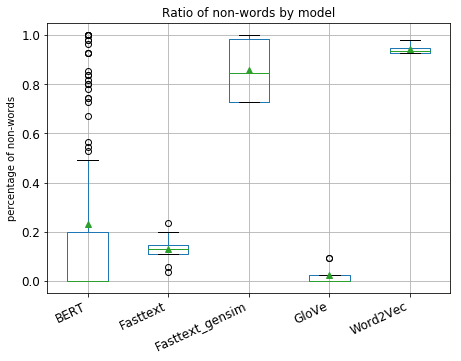

In [280]:
ha = ['right', 'center', 'left']
a =full_results.boxplot(column= "percentage of non-words", by= "model", ax=None, fontsize=12, rot=25, grid=True, figsize=(7,5), layout=None, return_type="both", showmeans=True )
plt.title("Ratio of non-words by model")
plt.suptitle('')
plt.ylabel("percentage of non-words")
plt.xlabel("")
plt.xticks(rotation=25, ha=ha[0])


In [279]:
print(a[0][0])

AxesSubplot(0.1,0.15;0.8x0.75)


C:\Users\Anna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

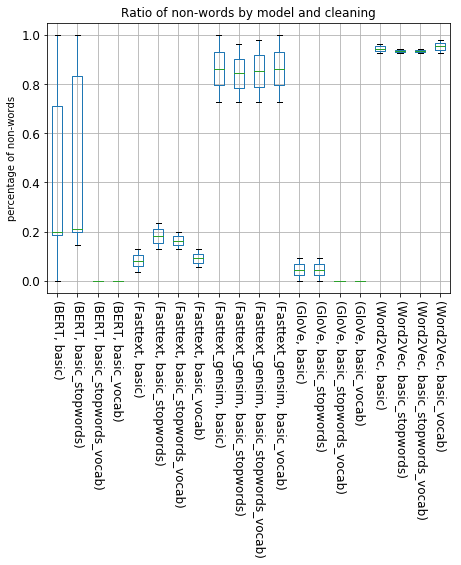

In [315]:
ha = ['right', 'center', 'left']
full_results.boxplot(column= "percentage of non-words", by= ["model", "cleaning"], ax=None, fontsize=12, rot=25, grid=True, figsize=(7,5), layout=None, return_type=None)
plt.title("Ratio of non-words by model and cleaning")
plt.suptitle('')
plt.ylabel("percentage of non-words")
plt.xlabel("")
plt.xticks(rotation=270)

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

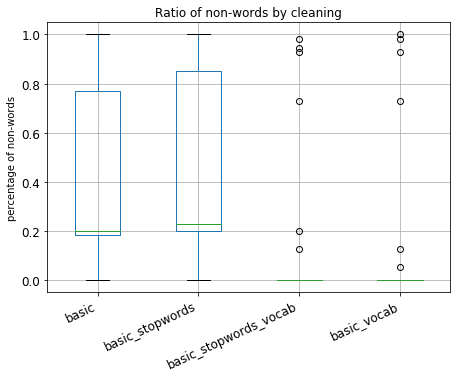

In [152]:
ha = ['right', 'center', 'left']
full_results.boxplot(column= "percentage of non-words", by= "cleaning", ax=None, fontsize=12, rot=25, grid=True, figsize=(7,5), layout=None, return_type=None)
plt.title("Ratio of non-words by cleaning")
plt.suptitle('')
plt.ylabel("percentage of non-words")
plt.xlabel("")
plt.xticks(rotation=25, ha=ha[0])

In [ ]:
rtgraph = pd.DataFrame()
rtgraph["average runtime"] = results.groupby(["model", "data"])["runtime"].mean()
#rtgraph = rtgraph.groupby(["runtime"])
#rtgraph["average runtime"] = rtgraph.apply(pd.mean()).reset_index()
rtgraph.head(152)

In [ ]:
rtgraph.plot.bar()

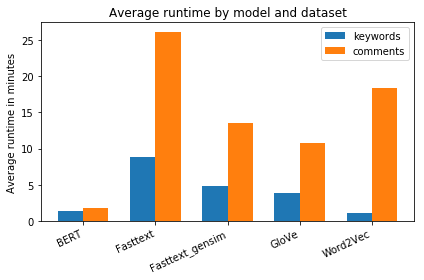

In [154]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
ha = ['right', 'center', 'left']

labels = ['BERT', 'Fasttext', 'Fasttext_gensim', 'GloVe', 'Word2Vec']
keywords_means = [1.400655, 8.803006, 4.800852, 3.881530, 1.169426]
comment_means = [1.785792, 26.093702, 13.575013, 10.818869, 18.380356]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, keywords_means, width, label='keywords')
rects2 = ax.bar(x + width/2, comment_means, width, label='comments')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average runtime in minutes')
ax.set_title('Average runtime by model and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=25, ha=ha[0])
fig.tight_layout()

plt.show()

In [ ]:
runtimes = results.sort_values(by=['runtime'])
runtimes.head(152)